In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../../data/00-raw-data/mobile_phone_rating.csv')

In [3]:
df

,Rank,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY
0,1,Huawei P60 Pro,1058,Mar-23,156,-,141,146,138
1,2,Apple iPhone 15 Pro Max,1199,Sep-23,154,149,143,149,-
2,3,Apple iPhone 15 Pro,999,Sep-23,154,-,142,-,-
3,4,Oppo Find X6 Pro,908,Mar-23,153,-,128,140,151
4,5,Honor Magic5 Pro,1199,Feb-23,152,125,138,151,141
...,...,...,...,...,...,...,...,...,...
148,149,Motorola Moto G23,229,Jan-23,54,-,-,-,-
149,150,Oppo A77 5G,329,Jun-22,53,-,106,-,138
150,151,Honor X8 5G,279,Mar-22,52,-,-,-,132
151,152,TCL 406,139,Feb-23,52,-,-,-,87


In [4]:
# replace '-' and null to '0' for future change column type
df.replace('-', 0, inplace=True)
df.replace(np.nan, 0, inplace=True)
df

,Rank,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY
0,1,Huawei P60 Pro,1058,Mar-23,156,0,141,146,138
1,2,Apple iPhone 15 Pro Max,1199,Sep-23,154,149,143,149,0
2,3,Apple iPhone 15 Pro,999,Sep-23,154,0,142,0,0
3,4,Oppo Find X6 Pro,908,Mar-23,153,0,128,140,151
4,5,Honor Magic5 Pro,1199,Feb-23,152,125,138,151,141
...,...,...,...,...,...,...,...,...,...
148,149,Motorola Moto G23,229,Jan-23,54,0,0,0,0
149,150,Oppo A77 5G,329,Jun-22,53,0,106,0,138
150,151,Honor X8 5G,279,Mar-22,52,0,0,0,132
151,152,TCL 406,139,Feb-23,52,0,0,0,87


In [5]:
df.dtypes

Rank             int64
Device          object
Launch Price     int64
Launch Date     object
CAMERA           int64
SELFIE          object
AUDIO           object
DISPLAY         object
BATTERY         object
dtype: object

In [6]:
# change the column's type
df['SELFIE'] = df['SELFIE'].astype(int)
df['AUDIO'] = df['AUDIO'].astype(int)
df['DISPLAY'] = df['DISPLAY'].astype(int)
df['BATTERY'] = df['BATTERY'].astype(int)
df['Device'] = df['Device'].astype(str)
df.dtypes

Rank             int64
Device          object
Launch Price     int64
Launch Date     object
CAMERA           int64
SELFIE           int64
AUDIO            int64
DISPLAY          int64
BATTERY          int64
dtype: object

In [7]:
#change the type of launch date
df.replace(0, np.nan, inplace=True)
df['Launch Date'] = pd.to_datetime(df['Launch Date'], format='%b-%y')

In [8]:
# fill null with each column's average

In [9]:
df['CAMERA'].fillna(int(df['CAMERA'].mean()), inplace=True)

In [10]:
df['SELFIE'].fillna(int(df['SELFIE'].mean()), inplace=True)

In [11]:
df['AUDIO'].fillna(int(df['AUDIO'].mean()), inplace=True)

In [12]:
df['DISPLAY'].fillna(int(df['DISPLAY'].mean()), inplace=True)

In [13]:
df['BATTERY'].fillna(int(df['BATTERY'].mean()), inplace=True)

In [14]:
#check nulls
null_counts = df.isnull().sum()
print(null_counts)

Rank            0
Device          0
Launch Price    0
Launch Date     1
CAMERA          0
SELFIE          0
AUDIO           0
DISPLAY         0
BATTERY         0
dtype: int64


In [15]:
df

,Rank,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY
0,1,Huawei P60 Pro,1058,2023-03-01,156,130.0,141.0,146.0,138.0
1,2,Apple iPhone 15 Pro Max,1199,2023-09-01,154,149.0,143.0,149.0,114.0
2,3,Apple iPhone 15 Pro,999,2023-09-01,154,130.0,142.0,128.0,114.0
3,4,Oppo Find X6 Pro,908,2023-03-01,153,130.0,128.0,140.0,151.0
4,5,Honor Magic5 Pro,1199,2023-02-01,152,125.0,138.0,151.0,141.0
...,...,...,...,...,...,...,...,...,...
148,149,Motorola Moto G23,229,2023-01-01,54,130.0,124.0,128.0,114.0
149,150,Oppo A77 5G,329,2022-06-01,53,130.0,106.0,128.0,138.0
150,151,Honor X8 5G,279,2022-03-01,52,130.0,124.0,128.0,132.0
151,152,TCL 406,139,2023-02-01,52,130.0,124.0,128.0,87.0


In [16]:
#create label
# Function to determine buying intent based on rank
def determine_buying_intent(Rank):
    if Rank <= 50:
        return 'very_willing'
    elif 51 <= Rank <= 100:
        return 'moderately_willing'
    else:
        return 'not_willing'
df['buying_intent'] = df['Rank'].apply(determine_buying_intent)

In [17]:
df

,Rank,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY,buying_intent
0,1,Huawei P60 Pro,1058,2023-03-01,156,130.0,141.0,146.0,138.0,very_willing
1,2,Apple iPhone 15 Pro Max,1199,2023-09-01,154,149.0,143.0,149.0,114.0,very_willing
2,3,Apple iPhone 15 Pro,999,2023-09-01,154,130.0,142.0,128.0,114.0,very_willing
3,4,Oppo Find X6 Pro,908,2023-03-01,153,130.0,128.0,140.0,151.0,very_willing
4,5,Honor Magic5 Pro,1199,2023-02-01,152,125.0,138.0,151.0,141.0,very_willing
...,...,...,...,...,...,...,...,...,...,...
148,149,Motorola Moto G23,229,2023-01-01,54,130.0,124.0,128.0,114.0,not_willing
149,150,Oppo A77 5G,329,2022-06-01,53,130.0,106.0,128.0,138.0,not_willing
150,151,Honor X8 5G,279,2022-03-01,52,130.0,124.0,128.0,132.0,not_willing
151,152,TCL 406,139,2023-02-01,52,130.0,124.0,128.0,87.0,not_willing


In [18]:
#drop unnecessray column
df.drop(columns='Rank', inplace=True)
df

,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY,buying_intent
0,Huawei P60 Pro,1058,2023-03-01,156,130.0,141.0,146.0,138.0,very_willing
1,Apple iPhone 15 Pro Max,1199,2023-09-01,154,149.0,143.0,149.0,114.0,very_willing
2,Apple iPhone 15 Pro,999,2023-09-01,154,130.0,142.0,128.0,114.0,very_willing
3,Oppo Find X6 Pro,908,2023-03-01,153,130.0,128.0,140.0,151.0,very_willing
4,Honor Magic5 Pro,1199,2023-02-01,152,125.0,138.0,151.0,141.0,very_willing
...,...,...,...,...,...,...,...,...,...
148,Motorola Moto G23,229,2023-01-01,54,130.0,124.0,128.0,114.0,not_willing
149,Oppo A77 5G,329,2022-06-01,53,130.0,106.0,128.0,138.0,not_willing
150,Honor X8 5G,279,2022-03-01,52,130.0,124.0,128.0,132.0,not_willing
151,TCL 406,139,2023-02-01,52,130.0,124.0,128.0,87.0,not_willing


In [19]:
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
shuffled_df

,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY,buying_intent
0,Xiaomi 12T,599,2022-10-01,115,130.0,126.0,131.0,118.0,moderately_willing
1,OnePlus Nord 2T 5G,399,2022-05-01,114,130.0,115.0,128.0,112.0,moderately_willing
2,Samsung Galaxy S21+ 5G (Exynos),1059,2021-01-01,111,130.0,124.0,128.0,114.0,moderately_willing
3,Oppo A94 5G,359,2021-03-01,93,130.0,124.0,128.0,127.0,not_willing
4,Apple iPhone 14 Plus,899,2022-10-01,133,144.0,141.0,140.0,128.0,very_willing
...,...,...,...,...,...,...,...,...,...
148,Sony Xperia 5 V,999,2023-09-01,118,130.0,124.0,128.0,114.0,moderately_willing
149,Huawei P40,799,2020-02-01,102,130.0,124.0,128.0,114.0,not_willing
150,Xiaomi Mi 11 Ultra,1200,2021-03-01,141,125.0,119.0,124.0,108.0,very_willing
151,Xiaomi 12,749,2022-03-01,113,130.0,122.0,118.0,100.0,moderately_willing


In [21]:
df.describe()

,Launch Price,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,773.542484,111.274510,130.065359,124.241830,128.183007,114.627451
std,376.630595,26.744708,6.664589,11.857169,11.031914,15.107894
min,139.000000,51.000000,83.000000,86.000000,87.000000,75.000000
25%,459.000000,94.000000,130.000000,120.000000,125.000000,106.000000
50%,799.000000,117.000000,130.000000,124.000000,128.000000,114.000000
75%,999.000000,130.000000,130.000000,132.000000,133.000000,126.000000
max,1799.000000,156.000000,149.000000,161.000000,152.000000,152.000000


In [22]:
# to csv
shuffled_df.to_csv('../../data/01-modified-data/after_clean_mobile_phone_rating.csv', index=False)

In [23]:
df['Brand'] = df['Device'].str.split().str[0]

In [24]:
df_top_50=df[:50]

In [25]:
df_top_50

,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY,buying_intent,Brand
0,Huawei P60 Pro,1058,2023-03-01,156,130.0,141.0,146.0,138.0,very_willing,Huawei
1,Apple iPhone 15 Pro Max,1199,2023-09-01,154,149.0,143.0,149.0,114.0,very_willing,Apple
2,Apple iPhone 15 Pro,999,2023-09-01,154,130.0,142.0,128.0,114.0,very_willing,Apple
3,Oppo Find X6 Pro,908,2023-03-01,153,130.0,128.0,140.0,151.0,very_willing,Oppo
4,Honor Magic5 Pro,1199,2023-02-01,152,125.0,138.0,151.0,141.0,very_willing,Honor
5,Oppo Find X6,681,2023-03-01,150,130.0,127.0,128.0,114.0,very_willing,Oppo
6,Huawei Mate 50 Pro,1299,2022-09-01,149,145.0,144.0,141.0,103.0,very_willing,Huawei
7,Google Pixel 7 Pro,899,2022-10-01,147,142.0,137.0,146.0,102.0,very_willing,Google
8,Honor Magic4 Ultimate,1211,2022-03-01,147,122.0,124.0,140.0,114.0,very_willing,Honor
9,Apple iPhone 14 Pro Max,1099,2022-09-01,146,145.0,142.0,149.0,133.0,very_willing,Apple


In [26]:
brands_counts=df_top_50['Brand'].value_counts()

In [27]:
brands_counts[1:]

Xiaomi      9
Huawei      6
Samsung     6
Google      5
Vivo        5
Oppo        4
Honor       2
Motorola    1
Asus        1
OnePlus     1
Name: Brand, dtype: int64

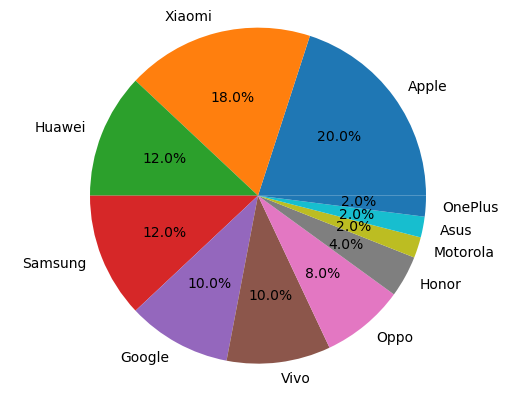

In [28]:
import matplotlib.pyplot as plt

# Plotting the pie chart
fig, ax = plt.subplots()
brands_counts.plot.pie(autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_ylabel('')  # Hide the y-axis label

plt.show()

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

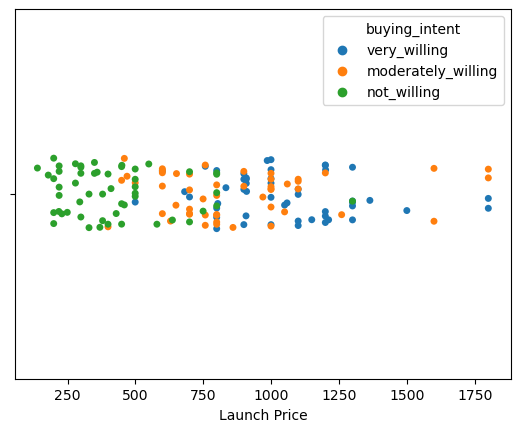

In [30]:
# Create a dot plot for the 'total_bill' column
sns.stripplot(x=df['Launch Price'],hue=df['buying_intent'])

# Show the plot
plt.show()

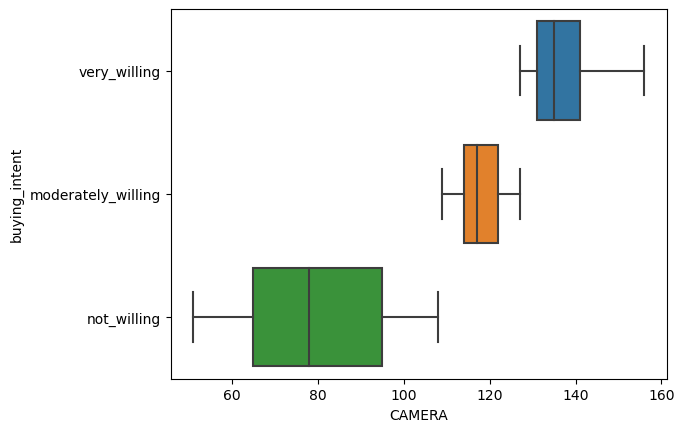

In [31]:
# Create a dot plot for the 'total_bill' column
sns.boxplot(x=df['CAMERA'],y=df['buying_intent'])

# Show the plot
plt.show()

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
df_feature=df[['Launch Price','CAMERA','AUDIO','DISPLAY','BATTERY']]

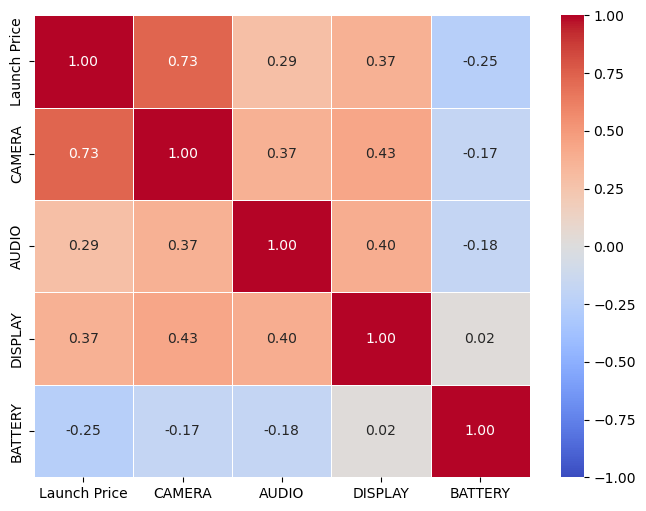

In [34]:
corr=df_feature.corr()
plt.figure(figsize=(8, 6))  # Optional: specify the size of your plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.show()